
# Urban Destitute Children Rehabilitation Tracer Study
## Dertermining Sample Size

### Author: Zerihun Associates

In [1]:
import math
from decimal import Decimal
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns

In [2]:
os.getcwd()

<IPython.core.display.Javascript object>

'C:\\Users\\abebu\\Dropbox\\World Bank\\WB-DRC\\Inception Phase\\Determining_Sample_Size\\Determining-Sample-Size'

### The following parameters are required to calculate City-level sample size for Urban Destitute Children Rehabilitation Tracer Study

`The confidence level`: How confident do we need to be to ensure the results didn’t occur by chance? Detecting it with higher confidence requires more sample. Typical choices include 95% confidence (`alpha`=0.05)  or 99% confidence (`alpha`=0.01). In our calculation we will include both 95% and 99%, although we  may have to go with the 95% confidence level due to financial constraints. The confidence level is 1 minus `alpha` - significance level or probability of Type I error (false positives). 

`The percentage difference that we want to be able to detect`: The smaller the differences we want to be able to detect, the more sample will be required. `effect_size`: The standardised effect size ie.  If the difference between the two means divided by the standard deviation, then we will have `effect size`. The percentage diffrence that we want to be able to deteect must be positive. 

`The absolute values of the probabilities you want to detect differences on`: This is a little trickier and somewhat unique to the particular test we’re working with. It turns out that, for example, detecting a difference between 50% and 51% requires a different sample size than detecting a difference between 80% and 81%. In other words, the sample size required is a function of p1, not just p1 — p2.

`The distribution of the data results`: Say that we want to compare proportions within sub-groups (in our case, say we want to subdivide proportion of reintegration by gender). This means that we need the sample to be big enough within each subgroup to get statistically significant comparisons. We often don’t know how the sample will plan out within each of these groups (it may be much harder to get sample for some). One option is to assume sample is distributed uniformly across subgroups. 


To determine our sample size, we need to determine the minimum sample required to detect outcome variable of interest (child-outcome metrics). The main goal of UPSNP Urban Destitute Children Rehabilitation tracer study is to measure durable `reintegration` of Children in Street Situation (CSS) within a social context capable of surpporting and carring for them - ideally but not necessarily thier family of origin. For this tracer study - our variable of interest `reintegration` is defind as children who are in a stable and sustained placement, that is:

+ safely sheltered from elements 
+ protected from physical and sexual abuse, exploitation for labor and other violations
+ physically healthy, well-nourished and clean
+ accessing support for psychological trauma
+ in or on the way to a safe and sustainable livelihood – which may

There are limited available emprical data to help us determine the initial probability (p1) for 95% confidence level. The best source of information we have is monitoring information from Government of Ethiopia Minstry of Labor and Social Affairs monitoring report and service providers who are implementing partners. We have called all service providers to ask them reintegration rate (as per the definition above) based on their experiance implementing Urban Destitute Children project and also from their previous experaince implementing similar interventions. The following table presents the reintegration results from MOLSA and service providers.

In [3]:
#Load the reintegration rates data gathered from MoLSA monitoring report and CSS Service Providers
rt = pd.read_csv("r_rates.csv", header=0, index_col=0)
rt

,Name of Service providers,enrolled_plan,enrolled_current,Reintegrated _current,r_rate_molsa,r_rate_sps
City,,,,,,
Addis Ababa,Siddarth Development Ethiopia,360,79,NaN,0.0,40.0
Addis Ababa,New life teen Challenge,50,25,8.0,32.0,25.0
Addis Ababa,Forum on sustainable child Empowerment,720,80,NaN,0.0,40.0
Addis Ababa,OPRIFS,260,22,NaN,0.0,75.0
Addis Ababa,Good Samaritan Training Center,200,78,2.0,3.0,NaN
Addis Ababa,Bright Star,200,160,38.0,24.0,33.3
Addis Ababa,OSSHD,500,91,30.0,33.0,12.0
Addis Ababa,MCMDO,1842,183,24.0,13.0,13.0
Adama,Tsega Street Children holistic Organization,178,0,NaN,NaN,30.0


We found the data from service providers to be more reliable than the MoLSA monitoring data as it only captures a snap shot of specific and narrow implementation time period. In addition, we don't have data on enrollment period and reintegration period. As a result we have decided to take `r_rate_sps` column to calculate initial probability. In determining sample size, We will take two versions of `p1`: 
- average of `r_rate_sps`, we will calcualte mean, median, percentils and pick an average not impacted by outliers.
- minimum of `r_rate_sps`, taking a more extreme approch of minimum initial probability.

In [4]:
# Determine average parameter 
rt.r_rate_sps.describe()

count    12.000000
mean     32.191667
std      17.189450
min      12.000000
25%      20.000000
50%      31.500000
75%      40.000000
max      75.000000
Name: r_rate_sps, dtype: float64

In [5]:
# determine p1 - take 50th percentile (median) and minimum 
p1_ave=rt.r_rate_sps.median()
p1_min=rt.r_rate_sps.min()

print("Average rate of Service Providers Reintegration: {}".format(p1_ave))
print("Minimum rate of Service Providers Reintegration: {}".format(p1_min))

Average rate of Service Providers Reintegration: 31.5
Minimum rate of Service Providers Reintegration: 12.0


### Sample Size

In [6]:
def z_calc(p1, p2, n1, n2):
    p_star = (p1*n1 + p2*n2) / (n1 + n2)
    return (p2 - p1) / math.sqrt(p_star*(1 - p_star)*((1.0 / n1) + (1.0 / n2)))

In [7]:

def sample_required(p1, p_diff, alpha):
    if p_diff <= 0:
        raise ValueError("p_diff must be > 0")
    n = 1
    while True:
        z = z_calc(p1, p1+p_diff, n1=n, n2=n)
        p = 1 - stats.norm.cdf(z)
        if p < alpha:
            break
        n += 1
    return n

#### Sample Size Required using `p1_ave` (median initial probability)

In [8]:
p1_ave=math.floor(p1_ave)
p_diffs = [x*.01 for x in range(5,21)]

In [9]:
#Observe probability difference from 5% to 20%

p_diffs = [x*.01 for x in range(5,21)]
data = []
for p_diff in p_diffs:
    record = {}
    record['Probability Difference'] = p_diff * 100
    record['Sample Size to Detect Difference'] = sample_required(p1=.315,
                                                                p_diff=p_diff,
                                                                alpha=.05)
    record['Confidence Level'] = '95%'
    record['Initial probability'] = '31.5%'
    data.append(record)
df = pd.DataFrame(data)

The following table presents the total sample size required per city at 95% confidence level and median initial probability. 

In [10]:
df

,Probability Difference,Sample Size to Detect Difference,Confidence Level,Initial probability
0,5.0,486,95%,31.5%
1,6.0,340,95%,31.5%
2,7.0,252,95%,31.5%
3,8.0,194,95%,31.5%
4,9.0,154,95%,31.5%
5,10.0,126,95%,31.5%
6,11.0,105,95%,31.5%
7,12.0,89,95%,31.5%
8,13.0,76,95%,31.5%
9,14.0,66,95%,31.5%


[Text(0.5, 1.0, 'CSS Tracer Study Per City Sample Required, pl=31.5%, 95% Confidence Level')]

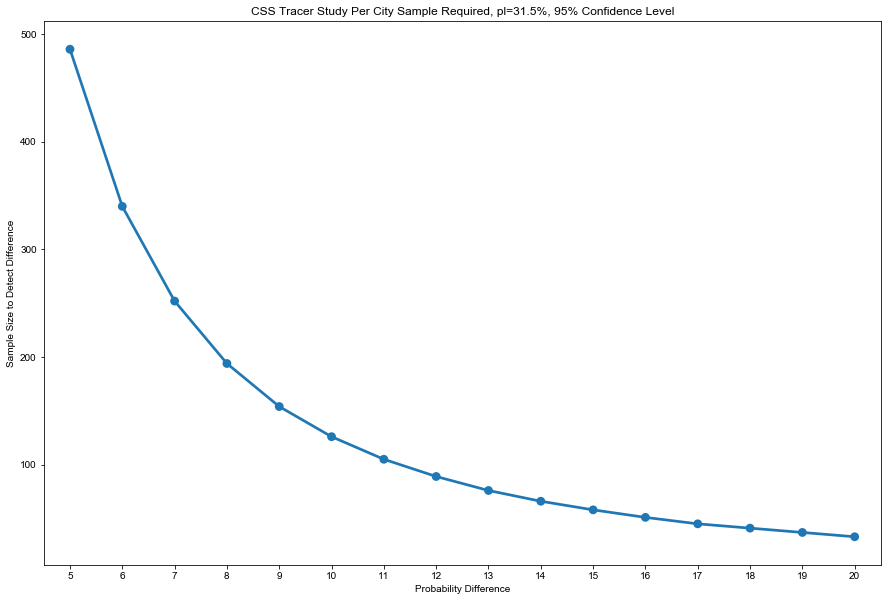

In [11]:
# Visualize sample size 

from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(15, 10))

sns.set_style(style = 'whitegrid')
plot = sns.pointplot(x='Probability Difference',
            y='Sample Size to Detect Difference', ax = ax,
            data=df)
ax.set(xticklabels=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
ax.set(title='CSS Tracer Study Per City Sample Required, pl=31.5%, 95% Confidence Level')

#### Attrition Adjusted Sample Size Required using `p1_ave` (median initial probability)
    
Hill (2004) reviews attrition in 13 panel studies in developing countries concludes that mobility accounts for most of survey attrition. Hill (2004) shows that tracking the respondents can reduce attrition by up to 45 percent.
Hill, Zelee (2004), “Reducing Attrition in Panel Studies in Developing Countries”, International Journal of  Epidemiology, 33, p.1-6 https://academic.oup.com/ije/article/33/3/493/716611

Panel survey conducted in Ethiopia between 2002 and 2007 by Yong Lives Project shows an average attrition rate of 3.64%, with the rate increasing to 4.5% with younger cohort. Stefan Dercon and ingo Outes-Leon
https://www.younglives.org.uk/sites/www.younglives.org.uk/files/YL-TN5-OutesLeon-Survey-Attrition.pdf

Although we don't have attrition figures for studies involving steet children in Ethiopia, based on experiance from other countries and implementing partners in this study we expect the attrition figure to go higher. As a result we propose to use an attrition rate of 30% in this study. 

In [21]:
p_diffs = [x*.01 for x in range(5,21)]
data = []
att=.3 # dropout percentage
for p_diff in p_diffs:
    record = {}
    record['Probability Difference'] = p_diff * 100
    record['Sample Size to Detect Difference'] = sample_required(p1=.315,
                                                                p_diff=p_diff,
                                                                alpha=.05)
    record['Attrition Adjusted Sample Size'] =(sample_required(p1=.315,
                                                                p_diff=p_diff,
                                                                alpha=.05) /(1 -att))
    record['Confidence Level'] = '95%'
    record['Initial probability'] = '31.5%'
    data.append(record)
df = pd.DataFrame(data)

The following table presents attrition ajusted sample size required per city at 95% confidence level and median initial probability.

In [22]:
#The following table presents attrition ajusted sample size required per city at 95% confidence level and median initial probability.
df

,Probability Difference,Sample Size to Detect Difference,Attrition Adjusted Sample Size,Confidence Level,Initial probability
0,5.0,486,694.285714,95%,31.5%
1,6.0,340,485.714286,95%,31.5%
2,7.0,252,360.000000,95%,31.5%
3,8.0,194,277.142857,95%,31.5%
4,9.0,154,220.000000,95%,31.5%
5,10.0,126,180.000000,95%,31.5%
6,11.0,105,150.000000,95%,31.5%
7,12.0,89,127.142857,95%,31.5%
8,13.0,76,108.571429,95%,31.5%
9,14.0,66,94.285714,95%,31.5%


[Text(0.5, 1.0, 'CSS Tracer Study Per City Attrition Adjusted Sample Size Required')]

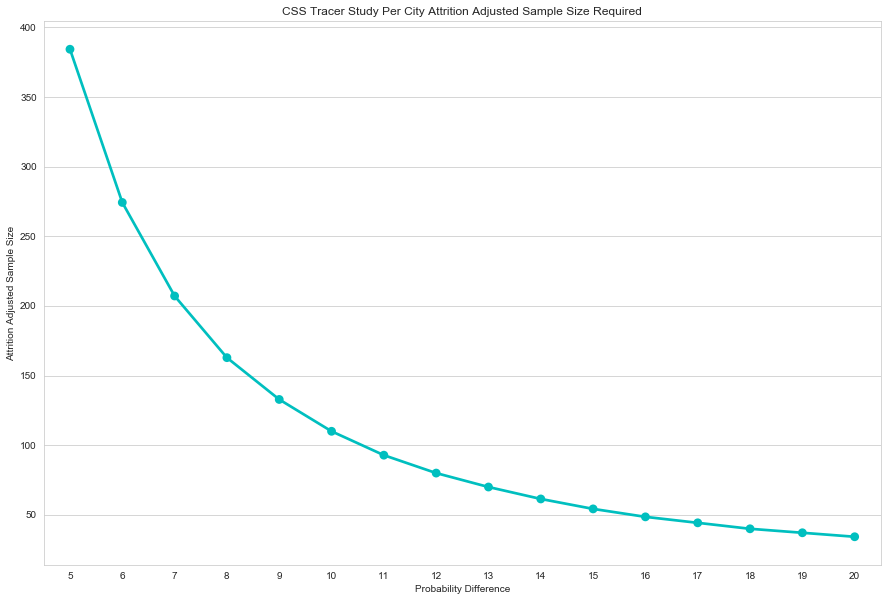

In [24]:
# Visualize Attrition adjusted sample size required in graph. 

from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(15, 10))

sns.set_style(style = 'whitegrid')
plot = sns.pointplot(x='Probability Difference',
            y='Attrition Adjusted Sample Size', color='c', ax = ax,
            data=df)
ax.set(xticklabels=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
ax.set(title='CSS Tracer Study Per City Attrition Adjusted Sample Size Required')

#### Sample Size Required using `p1_min` (minimum initial probability)

In [15]:
#Observe probability difference from 5% to 20%

p_diffs = [x*.01 for x in range(5,21)]
data = []
for p_diff in p_diffs:
    record = {}
    record['Probability Difference'] = p_diff * 100
    record['Sample Size to Detect Difference'] = sample_required(p1=.12,
                                                                p_diff=p_diff,
                                                                alpha=.05)
    record['Confidence Level'] = '95%'
    record['Initial probability'] = '12%'
    data.append(record)
df = pd.DataFrame(data)

The following table presents the total sample size required per city at 95% confidence level and conservative estimate of initial probability. 

In [16]:
df

,Probability Difference,Sample Size to Detect Difference,Confidence Level,Initial probability
0,5.0,269,95%,12%
1,6.0,192,95%,12%
2,7.0,145,95%,12%
3,8.0,114,95%,12%
4,9.0,93,95%,12%
5,10.0,77,95%,12%
6,11.0,65,95%,12%
7,12.0,56,95%,12%
8,13.0,49,95%,12%
9,14.0,43,95%,12%


[Text(0.5, 1.0, 'CSS Tracer Study Per City Sample Required, pl=31.5%, 95% Confidence Level')]

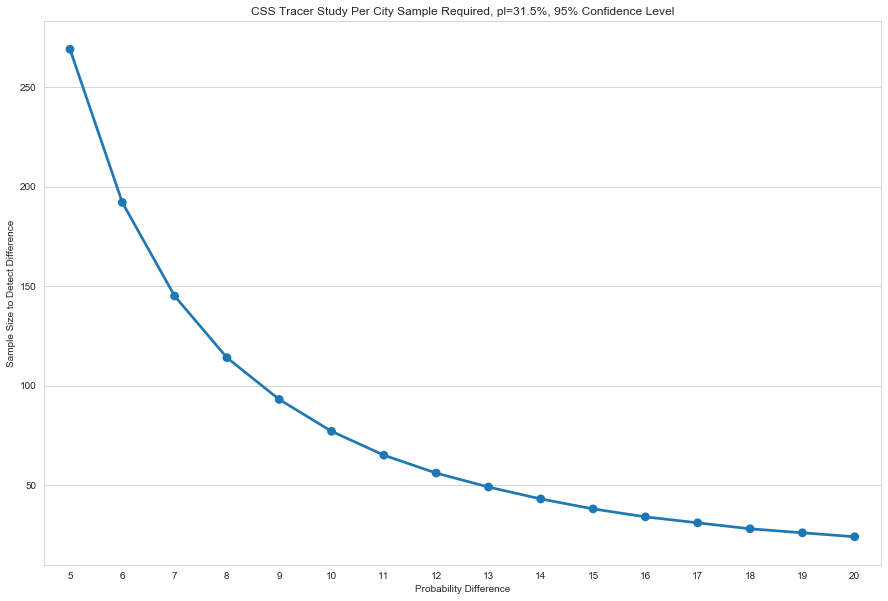

In [17]:
# Visualize sample size 

from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(15, 10))

sns.set_style(style = 'whitegrid')
plot = sns.pointplot(x='Probability Difference',
            y='Sample Size to Detect Difference', ax = ax,
            data=df)
ax.set(xticklabels=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
ax.set(title='CSS Tracer Study Per City Sample Required, pl=31.5%, 95% Confidence Level')

#### Attrition Adjusted Sample Size Required using `p1_min` (minimum initial probability)

In [23]:
p_diffs = [x*.01 for x in range(5,21)]
data = []
att=.3 # dropout percentage
for p_diff in p_diffs:
    record = {}
    record['Probability Difference'] = p_diff * 100
    record['Sample Size to Detect Difference'] = sample_required(p1=.12,
                                                                p_diff=p_diff,
                                                                alpha=.05)
    record['Attrition Adjusted Sample Size'] =(sample_required(p1=.12,
                                                                p_diff=p_diff,
                                                                alpha=.05) /(1 - att))
    record['Confidence Level'] = '95%'
    record['Initial probability'] = '12%'
    data.append(record)
df = pd.DataFrame(data)

In [25]:
#The following table presents attrition ajusted sample size required per city at 95% confidence level and minimum initial probability.
df

,Probability Difference,Sample Size to Detect Difference,Attrition Adjusted Sample Size,Confidence Level,Initial probability
0,5.0,269,384.285714,95%,12%
1,6.0,192,274.285714,95%,12%
2,7.0,145,207.142857,95%,12%
3,8.0,114,162.857143,95%,12%
4,9.0,93,132.857143,95%,12%
5,10.0,77,110.000000,95%,12%
6,11.0,65,92.857143,95%,12%
7,12.0,56,80.000000,95%,12%
8,13.0,49,70.000000,95%,12%
9,14.0,43,61.428571,95%,12%


[Text(0.5, 1.0, 'CSS Tracer Study Per City Attrition Adjusted Sample Size Required')]

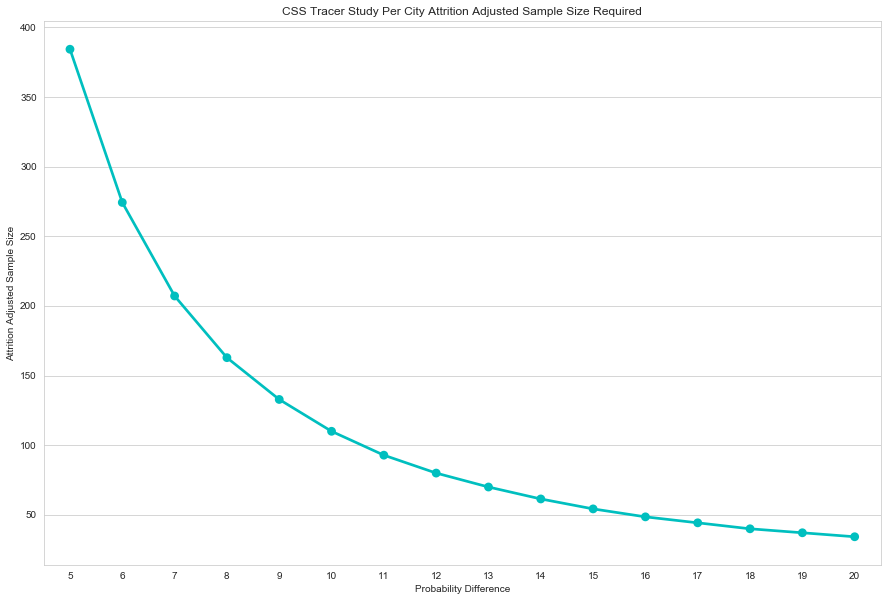

In [26]:
# Visualize Attrition adjusted sample size 

from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(15, 10))

sns.set_style(style = 'whitegrid')
plot = sns.pointplot(x='Probability Difference',
            y='Attrition Adjusted Sample Size', color='c', ax = ax,
            data=df)
ax.set(xticklabels=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
ax.set(title='CSS Tracer Study Per City Attrition Adjusted Sample Size Required')